In [1]:
import os
import numpy as np 

import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
import operator 

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
pth = os.getcwd()
f = 'covid19.ipynb'
os.path.join(pth,f)

'/Users/nhathiep/Python_Projects/Covid/covid19.ipynb'

In [3]:
#where the static assets/ images are saved
dimgf = 'Assets/Displayed'
imgf = 'Assets'
os.path.join(pth,imgf)

'/Users/nhathiep/Python_Projects/Covid/Assets'

<div> <img src="Assets/covid_spikes.jpg" width="100" align ='left' alt="alt_text"> </div> 

## Coronavirus (COVID-19)  
<br>
<br>

In [4]:
print(f'Updated on {dt.datetime.today().strftime("%d-%B-%Y")}')

Updated on 19-January-2022


<br>
<br>
<u><b>Datasets:</b></u>  <br>
- <b><font color='red'>Confirmed cases</font></b>, raw data <a href=https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv> here </a>
and <b><font color='red'>Latest cases</font></b>, raw data <a href =https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-02-2021.csv> here </a><br>
- <b><font color='red'> Covid19 open data</font></b>: comprehensive data inc. vaccinations, hospitalisations. 
See <a href =https://github.com/GoogleCloudPlatform/covid-19-open-data#aggregated-table> here </a>

<u><b>Sources:</b></u>  <br>
- <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>. Field definition: [Link here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)
- <a href='https://open-covid-19.github.io/explorer/#main-table'> Covid19 Open data </a> and associated <a href='https://github.com/GoogleCloudPlatform/covid-19-open-data#covid-19-open-data'>Github</a> by Googlecloud
- <a href='https://www.data.gouv.fr/fr/datasets/indicateurs-de-lactivite-epidemique-taux-dincidence-de-lepidemie-de-covid-19-par-metropole/#resources'> Santé publique France </a> - French National Health Agency

<u><b>Data processing:</b></u> automation, data wrangling, exportable to Excel

# Coronavirus (COVID-19, as SARS-CoV-2)

   Coronavirus Case Data is provided by <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   <br>Mobility data is provided by <a href='https://www.apple.com/covid19/mobility'>Apple</a>
   <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>World Health Organization</a>
   <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>Centers for Disease Control and Prevention</a>
   <br>Check out map visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>JHU CCSE Dashboard</a>
   <br>Source code is on <a href='https://github.com/therealcyberlord'>my Github</a>
  
   
   <font face = "Verdana" size ="3">
   Feel free to provide me with feedbacks. 
       <br> Last update: 1/3/2021 6:39 PM ET. Updates to the data table. 
       <br> New Updates: Daily report data update for 1/3. time series data update for 1/2. Mobility data update for 1/2. 
   </font>
       <br>
   <font face = "Verdana" size ="3"> *Prediction models are trained from a later starting date (3/13/2020). Therefore, earlier dates might not be accurate. </font>
   <font face = "Verdana" size ="1">
    </font>
 <font face = "Verdana" size ="3"> Keep strong, world. We can get through this! </font>
   <font face = "Verdana" size = "3"> Thank you guys for all the support. </font>
<br>
<font face = "Verdana" size ="3"> Sections </font>
* <a href='#world_wide_graphs'>Exploring Global Coronavirus Cases</a>
* <a href='#country_graphs'>Exploring Coronavirus Cases From Different Countries</a>
* <a href='#prediction'>Worldwide Confirmed Cases Prediction</a>
* <a href='#data_table'>Data Table</a>
* <a href='#pie_charts'>Pie Charts</a>
* <a href='#bar_charts'>Bar Charts</a>
* <a href='#hospital_testing'>US Testing Data</a>
* <a href='#mobility_data'>Mobility Data for Hotspots</a>

In [5]:
#Global Data - All countries time-series
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#Daily reports on 2n Jan - for Global and US
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-02-2021.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/01-02-2021.csv')
#Apple Data
#apple_mobility = pd.read_csv('https://covid19-static.cdn-apple.com/covid19-mobility-data/2023HotfixDev27/v3/en-us/applemobilitytrends-2021-01-02.csv')

In [6]:
 def timestamp():
    """
    returns the timestamp of now as a string
    """
    return dt.datetime.today().strftime("%Y-%m-%d %H-%M-%S")

In [7]:
#Looking for the most recent files for Latest Y& US_medical
count = 0
while count < 10:
    try: 
        datefile = dt.datetime.today()- dt.timedelta(days= count)
        datetext = datefile.strftime("%m-%d-%Y")
        latest_data = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{datetext}.csv')
        us_medical_data = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{datetext}.csv')     
        break
    except:
        count += 1
        print(datetext, ' is not available')            
    

01-19-2022  is not available


In [8]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-19 04:21:23,33.93911,67.709953,158974,7383,NaN,NaN,Afghanistan,408.375995,4.644156
1,NaN,NaN,NaN,Albania,2022-01-19 04:21:23,41.15330,20.168300,236486,3277,NaN,NaN,Albania,8217.596775,1.385706
2,NaN,NaN,NaN,Algeria,2022-01-19 04:21:23,28.03390,1.659600,227559,6435,NaN,NaN,Algeria,518.936345,2.827838
3,NaN,NaN,NaN,Andorra,2022-01-19 04:21:23,42.50630,1.521800,29888,142,NaN,NaN,Andorra,38682.456481,0.475107
4,NaN,NaN,NaN,Angola,2022-01-19 04:21:23,-11.20270,17.873900,94275,1870,NaN,NaN,Angola,286.844250,1.983559


In [9]:
latest_data.dtypes

FIPS                   float64
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered              float64
Active                 float64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object

In [10]:
#Underlying population for New South Wales
#Incidence rate is cases per 100,000 persons
latest_data.set_index('Province_State',inplace=True)
incidence_rate = latest_data.loc['New South Wales']['Incident_Rate']/100000
NSW_pop = latest_data.loc['New South Wales']['Confirmed'] / incidence_rate
print(f'{NSW_pop:,.0f} inhabitants in NSW') # the comma means to display with thousand separator and '.0f' means no decimal 

8,118,000 inhabitants in NSW


In [11]:
#Checking the fatality rate
#definition: https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section3.html
#Fatality rate is deaths per 100 persons (%)
NSW_deaths = latest_data.loc['New South Wales']['Deaths'] 
NSW_confirmed = latest_data.loc['New South Wales']['Confirmed'] 
NSW_CaseFatalityRatio = NSW_deaths/NSW_confirmed
print(f'{NSW_CaseFatalityRatio:0%} ')

#Check it is the same number as table
#Multiply by 100 to convert into percent and check with 14 decimals accuracy using round(number,14)
check = round(NSW_CaseFatalityRatio*100, 14) == round(latest_data.loc['New South Wales']['Case_Fatality_Ratio'],14)
#print(latest_data.loc['New South Wales']['Case_Fatality_Ratio'] )
#print(round(NSW_CaseFatalityRatio*100,14) )

print (f'Calculated Fatality ratio is equal to Downloaded Fatality ratio: \033[1m {check}') #To print in Bold \033[1m

0.109965% 
Calculated Fatality ratio is equal to Downloaded Fatality ratio:  True


In [12]:
#confirmed cases
confirmed_df[confirmed_df['Province/State']=='New South Wales']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,475731,501389,536025,628289,690758,738891,773447,802690,832520,864817


# Latest Data (John Hopkins) - what the data Looks like

In [13]:
latest_data[latest_data.Country_Region =='Australia']

,FIPS,Admin2,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Province_State,,,,,,,,,,,,,
Australian Capital Territory,NaN,NaN,Australia,2022-01-19 04:21:23,-35.4735,149.0124,27618,20,NaN,NaN,"Australian Capital Territory, Australia",6451.296426,0.072417
New South Wales,NaN,NaN,Australia,2022-01-19 04:21:23,-33.8688,151.2093,864817,951,NaN,NaN,"New South Wales, Australia",10653.079576,0.109965
Northern Territory,NaN,NaN,Australia,2022-01-19 04:21:23,-12.4634,130.8456,7318,2,NaN,NaN,"Northern Territory, Australia",2979.641694,0.027330
Queensland,NaN,NaN,Australia,2022-01-19 04:21:23,-27.4698,153.0251,265565,63,NaN,NaN,"Queensland, Australia",5191.379142,0.023723
South Australia,NaN,NaN,Australia,2022-01-19 04:21:23,-34.9285,138.6007,81783,50,NaN,NaN,"South Australia, Australia",4656.020495,0.061137
Tasmania,NaN,NaN,Australia,2022-01-19 04:21:23,-42.8821,147.3272,21546,13,NaN,NaN,"Tasmania, Australia",4023.529412,0.060336
Victoria,NaN,NaN,Australia,2022-01-19 04:21:23,-37.8136,144.9631,685007,1735,NaN,NaN,"Victoria, Australia",10332.086457,0.253282
Western Australia,NaN,NaN,Australia,2022-01-19 04:21:23,-31.9505,115.8605,1323,9,NaN,NaN,"Western Australia, Australia",50.292709,0.680272


Field definition: [Link here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)  
**Note**: "Confirmed" is the latest cumulative case count

In [14]:
#Focusing on NSW
latest_data.reset_index(inplace=True)
latest_data[latest_data.Province_State =='New South Wales']

,Province_State,FIPS,Admin2,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
9,New South Wales,NaN,NaN,Australia,2022-01-19 04:21:23,-33.8688,151.2093,864817,951,NaN,NaN,"New South Wales, Australia",10653.079576,0.109965


# Ranking of countries

In [15]:
latest_data['Population'] = latest_data['Confirmed']/(latest_data['Incident_Rate']/100000)
#latest_data['Incidence'] = (latest_data['Population']/100000)*(latest_data['Incident_Rate'])

# Latest Data - total by country (summing all provinces/states)

In [16]:
countriesrank = latest_data.groupby('Country_Region')[['Population','Confirmed','Deaths','Recovered','Active']].sum().sort_values('Population', ascending = False)[:20]
countriesrank

,Population,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
China,1.404676e+09,118297,4849,0.0,0.0
India,1.371337e+09,37901241,487202,0.0,0.0
US,3.323046e+08,67589830,853955,0.0,0.0
Indonesia,2.735236e+08,4273783,144183,0.0,0.0
Brazil,2.101471e+08,23229851,621803,0.0,0.0
Pakistan,2.078318e+08,1338993,29037,0.0,0.0
Nigeria,2.061396e+08,251341,3116,0.0,0.0
Bangladesh,1.646894e+08,1632794,28164,0.0,0.0
Russia,1.466447e+08,10682826,316168,0.0,0.0


In [17]:
#Checking population of Germany
p = countriesrank.loc['Germany']['Population']
f'{p:,.0f} inhabitants'

'83,019,213 inhabitants'

# Latest data (John Hopkins) - summarising data by country and recalculating metrics (Population, %Infected, Mortality, Fatality)

In [18]:
countriesrank['%pop_infected'] = countriesrank['Confirmed'] / countriesrank['Population']
countriesrank['Mortality']  = countriesrank['Deaths'] / countriesrank['Population']
countriesrank['Fatality'] = countriesrank['Deaths'] / countriesrank['Confirmed']
countriesrank

,Population,Confirmed,Deaths,Recovered,Active,%pop_infected,Mortality,Fatality
Country_Region,,,,,,,,
China,1.404676e+09,118297,4849,0.0,0.0,0.000084,0.000003,0.040990
India,1.371337e+09,37901241,487202,0.0,0.0,0.027638,0.000355,0.012855
US,3.323046e+08,67589830,853955,0.0,0.0,0.203397,0.002570,0.012634
Indonesia,2.735236e+08,4273783,144183,0.0,0.0,0.015625,0.000527,0.033737
Brazil,2.101471e+08,23229851,621803,0.0,0.0,0.110541,0.002959,0.026767
Pakistan,2.078318e+08,1338993,29037,0.0,0.0,0.006443,0.000140,0.021686
Nigeria,2.061396e+08,251341,3116,0.0,0.0,0.001219,0.000015,0.012397
Bangladesh,1.646894e+08,1632794,28164,0.0,0.0,0.009914,0.000171,0.017249
Russia,1.466447e+08,10682826,316168,0.0,0.0,0.072848,0.002156,0.029596


In [19]:
countriesrank = countriesrank[::-1]

# Death toll for top-20 most populated countries
Sorted by population in descending order  
Vertical green line is <font color=green>average</font>  
Vertical orange line is <font color=orange>median</font>
<!-- ![alt text](Assets/deaths_ranking.png) -->

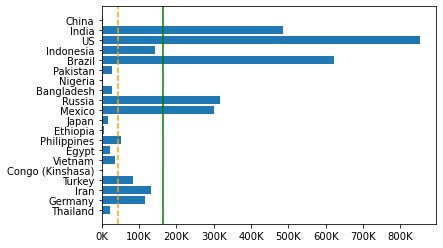

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt


# Make dataset
height = countriesrank.Deaths.tolist()
bars = countriesrank.index.tolist()
y_pos = np.arange(len(bars)) # returns index position [ 0,  1,  2,  3,..., 19]

fig, ax = plt.subplots()
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

#Create median
plt.axvline(x=np.median(countriesrank['Deaths']), color='orange', linestyle='--', label = 'median')
plt.axvline(x=np.average(countriesrank['Deaths']), color='green', linestyle='-', label = 'average')

#Fornat the X-axis
xaxis_values = plt.gca().get_xticks() #get all the tick values
ax.set_xticks(xaxis_values) #Set tick values from above (redundant but this is to prevent error message)
plt.gca().set_xticklabels([f'{x/1000:,.0f}K' for x in xaxis_values])

# Save & Show graphic
#plt.savefig(f'{dimgf}deaths-ranking_{timestamp()}.png',  bbox_inches='tight')
plt.plot(figsize=[10,16])
plt.show()

!conda install --yes --prefix {sys.prefix} seaborn

In [21]:
np.median(countriesrank['Deaths'])

44467.0

# Bubble chart: % Infected population,Fatality, Death toll
- **x axis** = %population infected (cumulative cases/population), approximation 
- **y axis** = Fatality rate (total deaths/total cases) | **bubble size** = # deaths
<!-- ![alt text](Assets/bubble.png) -->

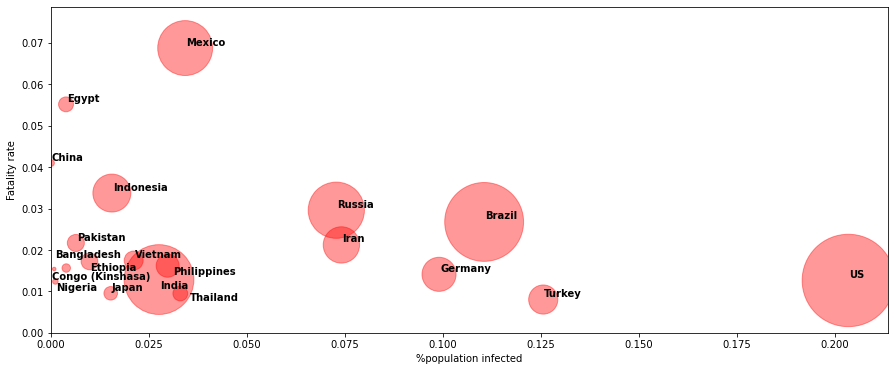

In [22]:
# library & dataset
import seaborn as sns
from adjustText import adjust_text

 
# # use the function regplot to make a scatterplot
# sns.regplot(x=countriesrank['Incidence'],
#             y=countriesrank['Fatality'])
# #sns.plt.show()
 
# # Without regression fit:
# sns.regplot(sns.regplot(x=countriesrank['Incidence'],
#             y=countriesrank['Fatality']),
#             fit_reg=False)

 
# create data
x = countriesrank['%pop_infected'] # x-axis rate
y=countriesrank['Fatality'] # y-axis rate
z=countriesrank['Deaths'] # Bubblesize #deaths (not a rate)
cname = countriesrank.index.tolist()

plt.figure(figsize = (15,6))
# plt.text(x, y, 
#       cname,size=11,horizontalalignment='center')

# Change color with c and alpha
plt.scatter(x, y, s=z/100, c="red", alpha=0.4)
plt.xlim([0,max(x)+0.01])
plt.ylim([0,max(y)+0.01])

# for line in range(0,len(x)):
#     if x[line]<= 0.005 and y[line]<= 0.02:
#         plt.text(x[line], y[line], cname[line], horizontalalignment='center', size=7, color='black', weight='semibold')
#     else: 
#         plt.text(x[line], y[line], cname[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

# This is to format the labelling to avoid overlap: https://github.com/Phlya/adjustText/wiki
texts = [plt.text(x[i], y[i], cname[i],
        ha='center', va='center',size='medium', color='black', weight='semibold') for i in range(len(x))]
adjust_text(texts)

plt.xlabel('%population infected')
plt.ylabel('Fatality rate')
#plt.show()
plt.savefig(f'{dimgf}/Bubble-chart_{datefile.strftime("%Y-%m-%d")}.png')
plt.show()

### Comments
- % population infected (approximation only as this does not consider the fact that reinfected people inflate confirmed cases): impacted by testing policy (number of test centres, free or paid tests, test kit avaibility etc); and by willingness of countries to report accurate case numbers
- Fatality rate: impacted by vaccination rate, hospital capacity/equipment; and by willingness of countries to report accurate case numbers and death toll
- Deaths: this should be analysed concurrently with population size

# Comparative Analysis on key indicators - covid19 open data (google-cloud)

Key indictors definitions: (metrics are smoothed out using 7-day running average)
- **vaccination_rate** = current_population vaccinated / total_population
- **new_cases_per_100** = daily_new_cases / total_population * 100 (aka incidence)
- **hospitalizations_per_10K** = current_hospitalized_patients/ total_population * 1000
- **deaths_per_100K** = daily_new_deaths / total_population * 100_000 (aka mortality)

##### View of key indicators by country

In [23]:
#meta data about covid19 open data
#indexcodes = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/index.csv')
#indexcodes

In [24]:
#complete set of columns to be selected, with new_hospitalized_patients
selectcols = ['date',
              'country_code',
              'cumulative_persons_fully_vaccinated',
              'new_confirmed',
              'new_hospitalized_patients', 'current_hospitalized_patients',
              'new_deceased','population', 'aggregation_level']

#partial set without new_hospitalized_patients - because Australia has an issue
selectcols1 = ['date',
               'country_code',
               'cumulative_persons_fully_vaccinated',
               'new_confirmed', 
               'current_hospitalized_patients', # no new hospitalized
               'new_deceased','population', 'aggregation_level']

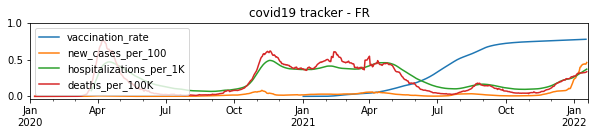

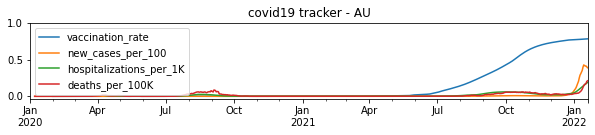

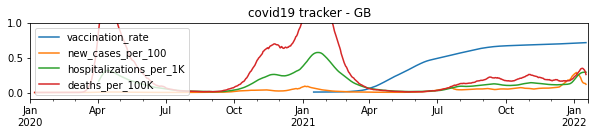

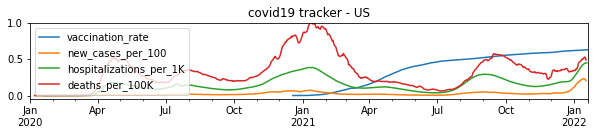

In [25]:
select_c = ['FR','AU','GB','US'] #list of countries to analyse for the Loop
startdate = dt.datetime(2020,1,1)
data = pd.DataFrame([])
population = list()


for country in select_c:
    df = pd.read_csv(f'https://storage.googleapis.com/covid19-open-data/v3/location/{country}.csv')
    df.date = df.date.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    if 'new_hospitalized_patients' in df.columns: 
        data = data.append(df[selectcols])
    else: #exception for Australia
        data = data.append(df[selectcols1])
    
    df = df.set_index('date')
    
    
    # Compute population counts
    total_population = df.population.iloc[0]
    population.append([country , total_population])
    #adult_population = total_population - df.population_age_00_09.iloc[0] - df.population_age_10_19.iloc[0]

    # Compute smoothed averages of our variables
    X = pd.DataFrame(index=df.index)
    X = X.iloc[X.index >= startdate]
    X['vaccination_rate'] = df.cumulative_persons_fully_vaccinated.rolling(7).mean() / total_population
    X['new_cases_per_100'] = df.new_confirmed.rolling(7).mean() / total_population * 1_00
    #X['incidence (per 100K'] = df.new_confirmed.rolling(7).sum() / total_population * 10
    X['hospitalizations_per_1K'] = df.current_hospitalized_patients.rolling(7).mean() / total_population * 1000
    X['deaths_per_100K'] = df.new_deceased.rolling(7).mean() / total_population * 100_000
    #X['deaths (per 10K)'] = df.new_deceased.rolling(7).mean() / total_population * 10_000

    X.plot(figsize=(10, 1.4), title=f'covid19 tracker - {country}')
    
    plt.ylim(top=1)
    plt.xlabel('') #turns off the x label
    plt.legend(loc='upper left') #location of the legend box

plt.show()

In [26]:
population = dict(population)
population

{'FR': 67012883, 'AU': 25499881, 'GB': 66647112, 'US': 331002647}

In [27]:
#Calculating additional metrics
data['vaccination_rate'] = data.cumulative_persons_fully_vaccinated.rolling(7).mean() / data.population
data['new_cases_per_100'] = data.new_confirmed.rolling(7).mean() / data.population * 1_00
data['incidence_per_100K'] = data.new_confirmed.rolling(7).sum() / data.population * 100_000
data['hospitalizations_per_1K'] = data.current_hospitalized_patients.rolling(7).mean() / data.population * 1000
data['deaths_per_100K'] = data.new_deceased.rolling(7).mean() / data.population * 100_000
#data['deaths (per 10K)'] = data.new_deceased.rolling(7).mean() / data.population * 10_000

In [28]:
colour = {'FR':'blue',
          'AU':'g',
          'GB':'grey',
          'US':'r'
         }
#data = data.reset_index()

def graph_metric(metric):
    for country in select_c:
        data_c = data[(data.country_code == country) &
                      (data.date >= startdate)]
        
        plt.figure(num=1, figsize=(10, 1.5))
        plt.plot( data_c.date,
                data_c[metric],
                label=country,
                color= colour[country]
                )

    plt.xlabel('') #turns off the x label
    plt.ylabel(metric)
    plt.legend()
    return plt.show()

##### Country comparison for each key indicator

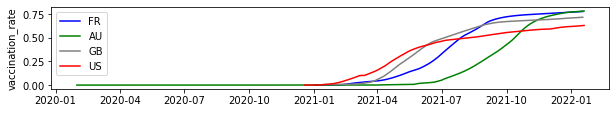

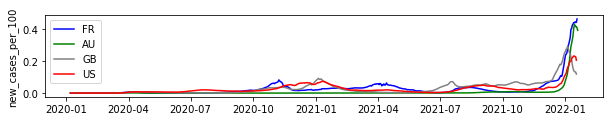

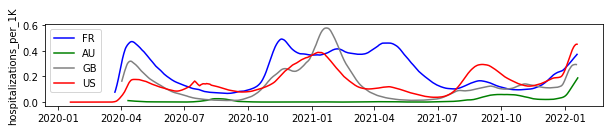

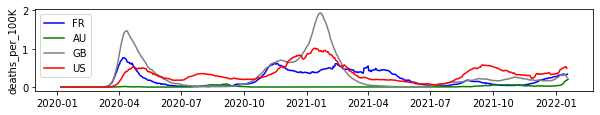

In [29]:
for metric in ['vaccination_rate', 'new_cases_per_100',
          'hospitalizations_per_1K', 'deaths_per_100K' ]:
    graph_metric(metric)

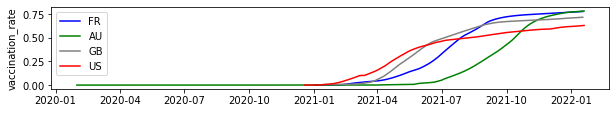

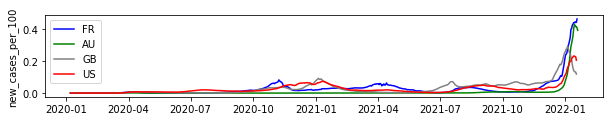

In [30]:
for metric in ['vaccination_rate', 'new_cases_per_100']:
    graph_metric(metric)

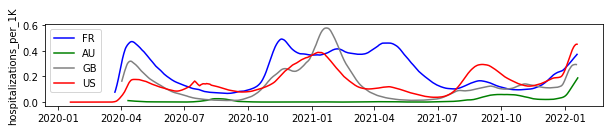

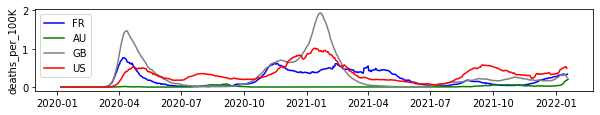

In [31]:
for metric in ['hospitalizations_per_1K', 'deaths_per_100K' ]:
        graph_metric(metric)

# The case of France
  
  
- New cases  
- Incidence rate (New cases/population * 100 000)

<!-- **New Cases**
![alt text](Assets/France_newcases.png)-->
<div> <img src="Assets/frenchflag.jpg" width="300" align ='middle' alt="alt_text"> </div> 

# Confirmed cases (John Hopkins) - what the data looks like
<br>
<br>
<br>
<br>
<br>
<br>

<!-- ![alt text](Assets/Confirmed_cases.png)  -->

In [32]:
#this selects the first 2 columns and the last 10 columns
display_col = confirmed_df.columns[:2].append( confirmed_df.columns[-10:] )

In [33]:
confirmed_df.iloc[:5,:][display_col]

,Province/State,Country/Region,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22
0,NaN,Afghanistan,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974
1,NaN,Albania,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486
2,NaN,Algeria,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559
3,NaN,Andorra,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888
4,NaN,Angola,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275


# New cases

In [34]:
confirmed_df['Province/State']= confirmed_df['Province/State'].fillna('Other')

In [35]:
confirmed_df[(confirmed_df['Country/Region']=='France') & (confirmed_df['Province/State']=='Other')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22
130,Other,France,46.2276,2.2137,0,0,2,3,3,3,...,11875607,11963184,12322734,12655210,12956857,13279505,13604085,13869172,13869172,13865920


In [36]:
confirmed_cases = confirmed_df.groupby(['Province/State', 'Country/Region', 'Lat', 'Long'])[confirmed_df.columns[4:]].sum().stack()
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases.rename({'level_4': 'Date', confirmed_cases.columns[5]: 'Cases'}, axis='columns', inplace = True)
confirmed_cases

,Province/State,Country/Region,Lat,Long,Date,Cases
0,Alberta,Canada,53.9333,-116.5765,1/22/20,0
1,Alberta,Canada,53.9333,-116.5765,1/23/20,0
2,Alberta,Canada,53.9333,-116.5765,1/24/20,0
3,Alberta,Canada,53.9333,-116.5765,1/25/20,0
4,Alberta,Canada,53.9333,-116.5765,1/26/20,0
...,...,...,...,...,...,...
202379,Zhejiang,China,29.1832,120.0934,1/14/22,2096
202380,Zhejiang,China,29.1832,120.0934,1/15/22,2096
202381,Zhejiang,China,29.1832,120.0934,1/16/22,2098
202382,Zhejiang,China,29.1832,120.0934,1/17/22,2098


In [37]:
# Or alternatively, use melt() instead of unstack()
test=pd.melt(confirmed_df,
            id_vars=['Country/Region', 'Province/State','Lat', 'Long'],
            var_name='date',
            value_name='cases')
test

,Country/Region,Province/State,Lat,Long,date,cases
0,Afghanistan,Other,33.939110,67.709953,1/22/20,0
1,Albania,Other,41.153300,20.168300,1/22/20,0
2,Algeria,Other,28.033900,1.659600,1/22/20,0
3,Andorra,Other,42.506300,1.521800,1/22/20,0
4,Angola,Other,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
203835,Vietnam,Other,14.058324,108.277199,1/18/22,2062128
203836,West Bank and Gaza,Other,31.952200,35.233200,1/18/22,477151
203837,Yemen,Other,15.552727,48.516388,1/18/22,10408
203838,Zambia,Other,-13.133897,27.849332,1/18/22,298032


In [38]:
#Calculate New cases from cases (which is cumulative cases)
by_group = confirmed_cases.groupby(['Province/State','Country/Region'])
confirmed_cases['Newcases'] = list(by_group.apply(lambda x: x['Cases']-x['Cases'].shift()))
confirmed_cases['Newcases'].fillna(0, inplace = True)

confirmed_cases['Date'] = confirmed_cases['Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%y') )


confirmed_cases[690:700]

#for i in confirmed_cases[550:600].iterrows(): print(i)

,Province/State,Country/Region,Lat,Long,Date,Cases,Newcases
690,Alberta,Canada,53.9333,-116.5765,2021-12-12,338428,0.0
691,Alberta,Canada,53.9333,-116.5765,2021-12-13,339291,863.0
692,Alberta,Canada,53.9333,-116.5765,2021-12-14,339541,250.0
693,Alberta,Canada,53.9333,-116.5765,2021-12-15,339997,456.0
694,Alberta,Canada,53.9333,-116.5765,2021-12-16,340470,473.0
695,Alberta,Canada,53.9333,-116.5765,2021-12-17,341023,553.0
696,Alberta,Canada,53.9333,-116.5765,2021-12-18,341023,0.0
697,Alberta,Canada,53.9333,-116.5765,2021-12-19,341023,0.0
698,Alberta,Canada,53.9333,-116.5765,2021-12-20,342948,1925.0
699,Alberta,Canada,53.9333,-116.5765,2021-12-21,343734,786.0


# Confirmed cases (John Hopkins) - Pivoting the data
- **Data wrangling**: dates are pivoted in such a way that they are now a dimension (as opposed to columns before)
- **New calculation**: number of new cases is added

In [39]:
confirmed_cases[(confirmed_cases['Country/Region']== 'France') & (confirmed_cases['Province/State']== 'Other')]

,Province/State,Country/Region,Lat,Long,Date,Cases,Newcases
84448,Other,France,46.2276,2.2137,2020-01-22,0,0.0
84449,Other,France,46.2276,2.2137,2020-01-23,0,0.0
84450,Other,France,46.2276,2.2137,2020-01-24,2,2.0
84451,Other,France,46.2276,2.2137,2020-01-25,3,1.0
84452,Other,France,46.2276,2.2137,2020-01-26,3,0.0
...,...,...,...,...,...,...,...
85171,Other,France,46.2276,2.2137,2022-01-14,13279505,322648.0
85172,Other,France,46.2276,2.2137,2022-01-15,13604085,324580.0
85173,Other,France,46.2276,2.2137,2022-01-16,13869172,265087.0
85174,Other,France,46.2276,2.2137,2022-01-17,13869172,0.0


**Notes**  
Cases: means cumulative cases  
New cases: means new daily cases (the delta between Cases on a given day and Cases on the day before)

# France - New cases (John Hopkins)

In [40]:
c1 = confirmed_cases['Country/Region']=='France'
c2 = confirmed_cases['Province/State']=='Other'
z = confirmed_cases[c1 & c2]
z = z.groupby('Date')[['Newcases']].sum().reset_index()
z

,Date,Newcases
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,2.0
3,2020-01-25,1.0
4,2020-01-26,0.0
...,...,...
723,2022-01-14,322648.0
724,2022-01-15,324580.0
725,2022-01-16,265087.0
726,2022-01-17,0.0


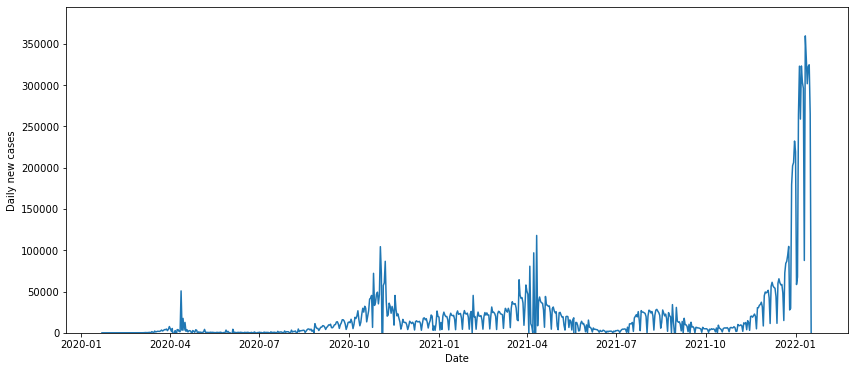

In [41]:
c1 = confirmed_cases['Country/Region']=='France'
c2 = confirmed_cases['Province/State']=='Other'
z = confirmed_cases[c1 & c2]
x = z['Date']
x_values = x #[dt.datetime.strptime(x,'%m/%d/%y') for x in x]
y = z['Newcases']

fig, ax = plt.subplots(figsize = [14,6])

ax.plot(x,y)

plt.xlabel('Date')
plt.ylabel('Daily new cases')

plt.ylim(bottom=0)

plt.show()

**Note**: 5 waves: Apr20, Oct20, Apr21, Aug21, Dec21

# France - Cumulative Cases

**Cumulative Cases**
<!-- ![alt text](Assets/France_cumulcases.png) -->

# France: incidence rate - validating covid19 open data (Google Cloud)

### Checking incidence rate: googlecloud (<font color='blue'>incidence_std</font>) with DataGouv/Sante France Publique - i.e. France's health national agency (<font color='orange'>incidence rate</font>) 

Incidence defined as: (100000 * daily new cases) / Population

In [42]:
# Metadata / schema
# pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/a8b5931a-3aa7-4aec-a81b-8b3de628cf63')

In [43]:
# Load data for the AU
FR = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/FR.csv')
#vax = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv')
FR.date = FR.date.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d') )
FR['incidence_per_100K'] = FR['new_confirmed'].rolling(7).mean()/FR['population']*100_000
FR['incidence_std_per_100K'] = (FR['new_confirmed']/FR['population'])*100_000
#Setting index so that can merge the dataframes (with "join")
FR.set_index('date', inplace=True)

Text(0, 0.5, 'Invidence rate per 100K')

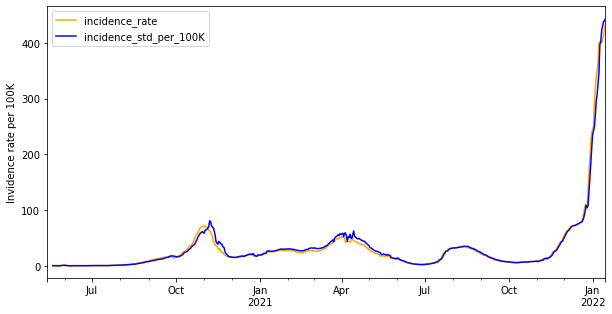

In [46]:
tx_std = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/59ad717b-b64e-4779-85f6-cd1b25b24703', sep=';')
#display(tx_std.tail()))

tx_std['jour'] = tx_std['jour'].apply(lambda x: (dt.datetime.strptime(x,'%Y-%m-%d')))
tx_std = tx_std.rename(columns={
    'fra':'country_code',
    'tx_std':'incidence_rate',
    'jour':'date'})

tx_std =tx_std.merge(FR, how='left', on= ['country_code', 'date'])
tx_std.set_index('date')[['incidence_rate','incidence_std_per_100K']].rolling(7).mean().plot(figsize=(10, 5), color=['orange','b'])
plt.xlabel('')
plt.ylabel('Invidence rate per 100K')


validated!

#Alternatively, with incidence being calculated - instead of provided in dataset
#https://www.data.gouv.fr/en/datasets/taux-dincidence-de-lepidemie-de-covid-19/
#(100000 * nombre de cas positif) / Population
ti_fr = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/57d44bd6-c9fd-424f-9a72-7834454f9e3c', sep=';')
ti_fr = ti_fr.loc[ti_fr.cl_age90 == 0] #selection national data only (not area, province etc)
ti_fr['jour'] = ti_fr['jour'].apply(lambda x: (dt.datetime.strptime(x,'%Y-%m-%d')))
ti_fr['ti'] = ti_fr.P.rolling(7).mean() / ti_fr['pop'].iloc[0] *100_000

ti_fr = ti_fr.rename(columns={
    'fra':'country_code',
    'ti':'incidence_official',
    'jour':'date'})
ti_fr.columns

ti = ti_fr.merge(FR, how='left', on= ['country_code', 'date'])
ti.set_index('date')[['incidence_official','incidence_per_100K']].plot(figsize=(15, 6))


###  France: checking daily new cases - Googlecloud (<font color='blue'>new_confirmed</font>) vs. John Hopkins (<font color='orange'>Newcases</font>)

Text(0, 0.5, 'Daily new cases')

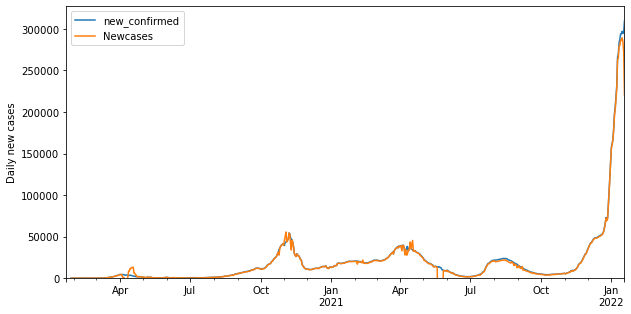

In [47]:
z = confirmed_cases[c1 & c2]

# # Load data for the AU
# FR = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/FR.csv')
# #vax = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv')
# FR.date = FR.date.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d') )
# FR['incidence_per_100K'] = FR['new_confirmed'].rolling(7).mean()/FR['population']*100_000
# FR['incidence_std_per_100K'] = (FR['new_confirmed']/FR['population'])*100_000
# #Setting index so that can merge the dataframes (with "join")
# FR.set_index('date', inplace=True)

z = z.rename(columns={'Date':'date'})
z.set_index('date', inplace=True)

z.join(FR)[['new_confirmed', 'Newcases']].rolling(7).mean().plot(figsize=(10,5))
#plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('')
plt.ylabel('Daily new cases')

*validated*!